In [1]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [2]:
model = VGG16(weights = 'imagenet', include_top = True) #imagenet ağırlıklarını aldık

Burada Katmanları İnceleyeceğiz
Model yapısına göz atacağız

In [3]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

Toplam Parametre Sayısına da Bakalım 

In [4]:
model.count_params()

138357544

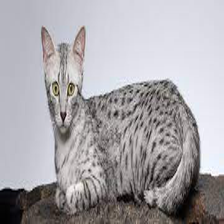

In [9]:
image_path = 'egyptiancat.jfif'
image = Image.open(image_path)
image = image.resize((224,224))
image

In [10]:
x = np.array(image, dtype='float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x = preprocess_input(x)

# TEST GÖRÜNTÜSÜ İLE SINIFLANDIRMA YAPMA

In [11]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0]) #olası en yüksek 3 değeri alacağız
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 1s 772ms/step
predicted: [('n02124075', 'Egyptian_cat', 0.9844833), ('n02127052', 'lynx', 0.004643222), ('n02325366', 'wood_rabbit', 0.0033192472)]
Egyptian_cat
